In [3]:
import pandas as pd

btc_file_path = './btc_raw.csv'
df_btc = pd.read_csv(btc_file_path)

df_btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tweet_file_path = './tweets_raw.csv'
df_tweet = pd.read_csv(tweet_file_path, encoding='utf-8', sep=';')

df_tweet.head()

C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_11624\1926961807.py:2: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tweet = pd.read_csv(tweet_file_path, encoding='utf-8', sep=';')


,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1132977055300300800,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14+00,0.0,0.0,0.0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS https://t.co...
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0.0,2.0,1.0,Another Test tweet that wasn't caught in the s...
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0.0,0.0,0.0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0.0,0.0,0.0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [5]:
btc_time = pd.to_datetime(df_btc['Timestamp'], unit='s')

first_date_btc = btc_time.min()
last_date_btc = btc_time.max()
print(first_date_btc, last_date_btc)

2011-12-31 07:52:00 2021-03-31 00:00:00


In [6]:
df_tweet_time = pd.to_datetime(df_tweet['timestamp'], errors='coerce')

In [7]:
df_tweet_time.dropna(inplace=True)

In [8]:
df_tweet_time.head()

0   2019-05-27 11:49:14+00:00
1   2019-05-27 11:49:18+00:00
2   2019-05-27 11:49:06+00:00
3   2019-05-27 11:49:22+00:00
4   2019-05-27 11:49:23+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [9]:
first_date_tweet = df_tweet_time.min()
last_date_tweet = df_tweet_time.max()
print(first_date_tweet, last_date_tweet)

2007-04-19 07:14:38+00:00 2019-11-23 15:45:57+00:00


In [10]:
# convert to timezone naive and then to python datetime
df_tweet_time_tz_naive = df_tweet_time.dt.tz_localize(None)
df_tweet_time_py = df_tweet_time_tz_naive.dt.to_pydatetime()

C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_11624\2587676585.py:3: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_tweet_time_py = df_tweet_time_tz_naive.dt.to_pydatetime()


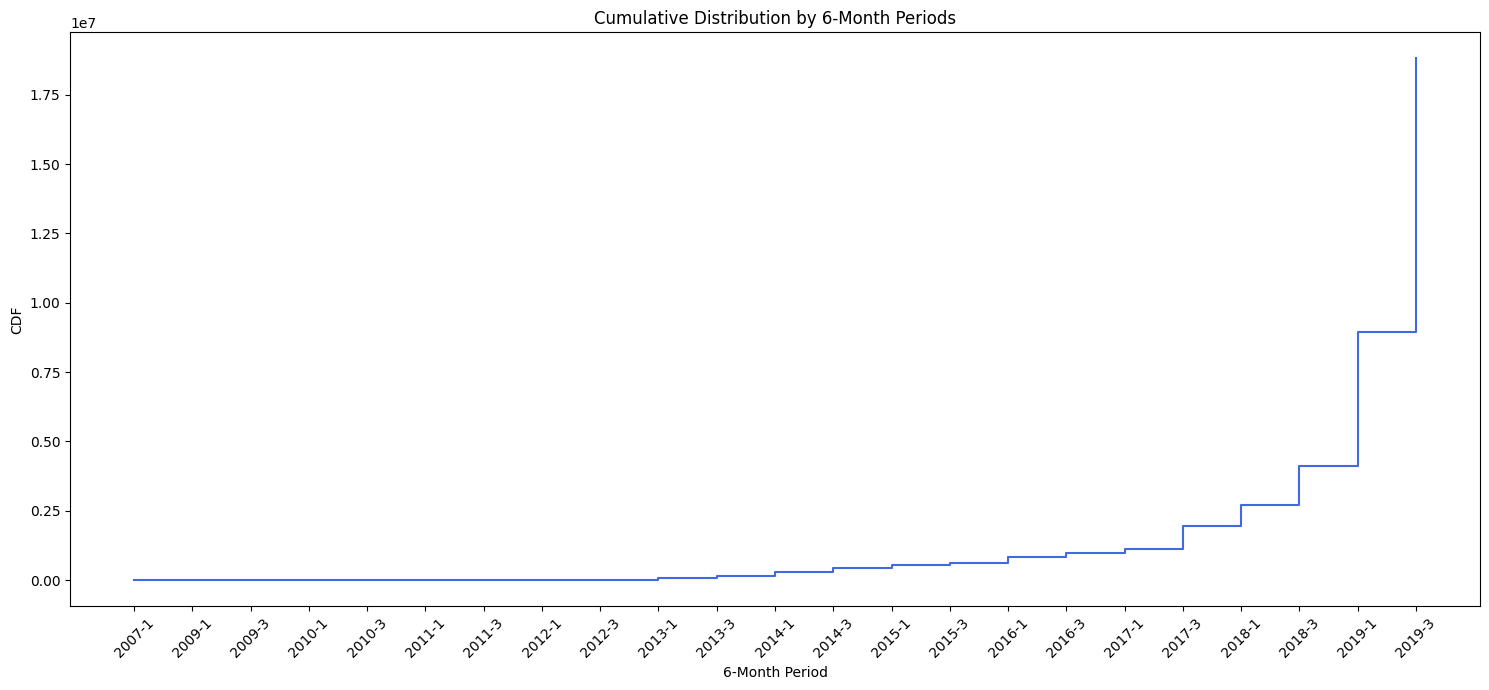

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Assuming df_tweet_time_py contains your datetime data
df = pd.DataFrame(df_tweet_time_py, columns=["Date"])
df["Date"] = pd.to_datetime(df["Date"])
df["Year_Half"] = df["Date"].dt.year.astype(str) + "-" + (2 * (df["Date"].dt.month > 6) + 1).astype(str)

grouped_dates = df.groupby("Year_Half").size().cumsum()

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(grouped_dates.index, grouped_dates.values, color='royalblue', drawstyle='steps-post')
ax.set_title("Cumulative Distribution by 6-Month Periods")
ax.set_xlabel("6-Month Period")
ax.set_ylabel("CDF")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
# make both dataframes on the same date format
df_btc_timestamp = pd.to_datetime(df_btc['Timestamp'], unit='s').dt.tz_localize('UTC')
df_tweet_timestamp = pd.to_datetime(df_tweet['timestamp'], utc=True)

In [13]:
# update date format for both dataframes
df_btc_time_fix = df_btc.copy()
df_btc_time_fix['Timestamp'] = df_btc_timestamp.dt.strftime('%Y-%m-%d %H:%M:%S')
df_tweet_time_fix = df_tweet.copy()
df_tweet_time_fix['timestamp'] = df_tweet_timestamp.dt.strftime('%Y-%m-%d %H:%M:%S')

In [14]:
df_btc_time_fix.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_tweet_time_fix.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1132977055300300800,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14,0.0,0.0,0.0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18,0.0,0.0,0.0,Cardano: Digitize Currencies; EOS https://t.co...
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06,0.0,2.0,1.0,Another Test tweet that wasn't caught in the s...
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22,0.0,0.0,0.0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23,0.0,0.0,0.0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [16]:
# remove all tweets and btc prices before 2016-01-01 and after 2019-03-29
df_btc_framed = df_btc_time_fix[(df_btc_time_fix['Timestamp'] >= '2016-01-01') & (df_btc_time_fix['Timestamp'] <= '2019-03-29')]
df_tweet_framed = df_tweet_time_fix[(df_tweet_time_fix['timestamp'] >= '2016-01-01') & (df_tweet_time_fix['timestamp'] <= '2019-03-29')]

In [17]:
first_date_btc = df_btc_framed['Timestamp'].min()
last_date_btc = df_btc_framed['Timestamp'].max()
print(first_date_btc, last_date_btc)

2016-01-01 00:00:00 2019-03-28 23:59:00


In [18]:
first_date_tweet = df_tweet_framed['timestamp'].min()
last_date_tweet = df_tweet_framed['timestamp'].max()
print(first_date_tweet, last_date_tweet)

2016-01-01 00:00:04 2019-03-28 23:59:10


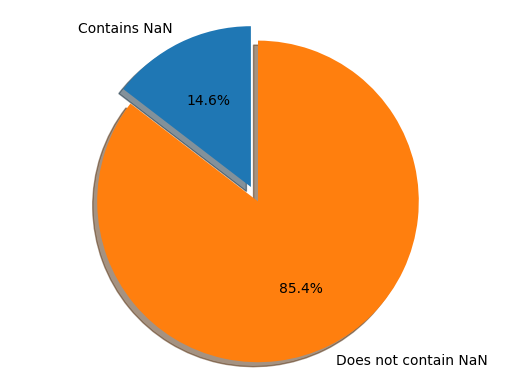

In [19]:
# Graph displaying the proportion of btc data points that contain any NaN value
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

countains_nan = df_btc_framed.isnull().any(axis=1).sum()
does_not_contain_nan = df_btc_framed.shape[0] - countains_nan

labels = 'Contains NaN', 'Does not contain NaN'
sizes = [countains_nan, does_not_contain_nan]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Contains NaN')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [20]:
# All NaN rows
nan_rows = df_btc_framed[df_btc_framed.isnull().any(axis=1)]
nan_rows.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2098336,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098339,2016-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098346,2016-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098350,2016-01-01 00:14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098353,2016-01-01 00:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# All columns here are with NaN values. Let's drop every row with NaN values
df_btc_framed.dropna(inplace=True)
nan_rows_no = df_btc_framed[df_btc_framed.isnull().any(axis=1)]
len(nan_rows_no)

C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_11624\3187476231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_framed.dropna(inplace=True)


0

In [22]:
# Order the dataframes by date
df_btc_framed.sort_values(by=['Timestamp'], inplace=True)
df_tweet_framed.sort_values(by=['timestamp'], inplace=True)

C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_11624\3198469984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_framed.sort_values(by=['Timestamp'], inplace=True)
C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_11624\3198469984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_framed.sort_values(by=['timestamp'], inplace=True)


In [23]:
# Save the new dataframes to csv
df_btc_framed.to_csv('./btc.csv', index=False)
df_tweet_framed.to_csv('./tweets.csv', index=False)